# Vector

In [62]:
from typing import List, Tuple, Callable


In [27]:
Vector = List[float]

In [4]:
height_weight_age = [70, 170, 40]
grades = [90, 80, 75, 62]

In [11]:
'''adding vectors'''

def add(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), 'vectors must be the same lenght'
    return [
        v_i + w_i for v_i, w_i in zip(v, w)   
           ]

assert add([1,2,3], [4,5,6]) == [5,7,9], 'not expected data'

In [14]:
'''subtracting vectors'''
def sub(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), 'vectors must be the same lenght'
    return [
        v_i - w_i for v_i, w_i in zip(v, w)   
           ]

assert sub([5,7,9], [4,5,6]) == [1,2,3], 'not expected data'

In [25]:
'''sum of all corresponding elements'''
def vector_sum(vectors: List[Vector]) -> Vector:
    assert vectors, 'no vectors provided'
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), 'different sizes'
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

assert vector_sum([[1,2], [3,4], [5,6], [7,8]]) == [16,20]

# Scalar Multiply

In [29]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    return [c * v_i for v_i in v]

assert scalar_multiply(2.0,[1,2,3]) == [2,4,6], 'didnot match the expected data'

In [30]:
def vector_mean(vectors: List[Vector]) -> Vector:
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [33]:
assert vector_mean([[1,2], [3,4], [5,6]]) == [3,4]

# Dot Product

In [34]:
def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), 'len of vectors dont match'
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

assert dot([1,2,3], [4,5,6]) == 32

In [45]:
def sum_of_squares(v: Vector) -> float:
    return dot(v,v)

In [46]:
assert sum_of_squares([1,2,3]) == 14

In [49]:
import math

def magnitude(v: Vector) -> float:
    return math.sqrt(sum_of_squares(v))

In [52]:
assert magnitude([3,4]) == 5

In [53]:
def squared_distance(v: Vector, w: Vector) -> float:
    return sum_of_squares(subtract(v,w))

In [54]:
def distance(v: Vector, w: Vector) -> float:
    return math.sqrt(squared_distance(v,w))

In [61]:
magnitude([4,3])

5.0

In [62]:
def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v,w))

# Matrices

In [32]:
Matrix = List[List[float]]

In [5]:
A = [[1,2,3],
     [4,5,6]
    ]

B = [[1,2],
    [3,4]
    ]

In [17]:
print(A[0][0])
print('lenght is :', len(A[0]))
print('no of cols:', len(A))

1
lenght is : 3
no of cols: 2


In [24]:
def shape(A) -> Tuple[int,int]:
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [25]:
assert shape([[1,2,3], [4,5,6]]) == (2,3), 'error on functions'

In [40]:

def get_row(A: Matrix, i: int) -> Vector:
    return A[i]

get_row([[1,2,3],[12,4]], 0)

[1, 2, 3]

In [46]:

def get_column(A, j: int) -> Vector:
    return [A_i[j] for A_i in A]

get_column([[1,2,3],[12,4]], 0)

[1, 12]

In [47]:
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    return [[entry_fn(i, j)
            for j in range(num_cols)]
            for i in range(num_rows)]

In [68]:
make_matrix(3, 4, lambda i, j: i*j if i == j else i - j)

[[0, -1, -2, -3], [1, 1, -1, -2], [2, 1, 4, -1]]

In [52]:
def identity_matrix(n: int) -> Matrix:
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

In [56]:
identity_matrix(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [93]:
data = [[70, 170, 40],
        [65, 120, 26],
        [77, 250, 19]
       ]

In [95]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), 
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [98]:
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [101]:
friend_matrix[0][1]

1

In [109]:
friend_matrix[5]

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0]

In [113]:
friends_of_five = [
    i
    for j in range(5)
    for i, is_friend in enumerate(friend_matrix[j])
    if is_friend
]

In [114]:
friends_of_five

[1, 2, 0, 2, 3, 0, 1, 3, 1, 2, 4, 3, 5]

# Playground

In [1]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('baseball.csv')
df1 = df.head(3)
df1

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403


In [21]:
x = df1[['RS', 'RA']]
y = df1[['Year']]

In [22]:
x = np.asmatrix(x)
y = np.asmatrix(y)

In [24]:
print(x);print()
print(y)

[[734 688]
 [700 600]
 [712 705]]

[[2012]
 [2012]
 [2012]]


In [26]:
'''apple orange coconuts'''
'''two persons'''

data = np.array([[5, 3, 2], [7, 5, 1]])

'''price spended by the persons day 1 day2'''

price = np.array([[50, 49],
                 [30, 27],
                 [12, 12]])

In [34]:
np.dot(data, price)

array([[364, 350],
       [512, 490]])

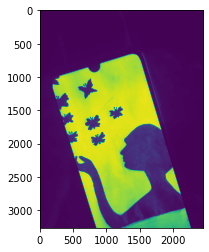

In [3]:
from matplotlib import image
from matplotlib import pyplot

image = image.imread('img.JPEG')
pyplot.imshow(image)
pyplot.show()

In [4]:
import numpy as np
from PIL import Image

im = np.array(Image.open('img.JPEG').convert('L'))
print(im)
a = im.T
gr_im= Image.fromarray(a).save('Image.png')
print(type(im))

[[2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 ...
 [3 2 5 ... 1 1 1]
 [2 0 3 ... 2 2 2]
 [4 1 3 ... 2 2 2]]
<class 'numpy.ndarray'>


In [5]:
b = im * 10
print(b)
values = [-5, -2, -1, 1, 2, 5]

for i in values:
    Image.fromarray(im * i).save(f'lal{i}.png')
# Image.fromarray(b).save('lal3.png')

[[20 20 20 ... 10 10 10]
 [20 20 20 ... 10 10 10]
 [20 20 20 ... 10 10 10]
 ...
 [30 20 50 ... 10 10 10]
 [20  0 30 ... 20 20 20]
 [40 10 30 ... 20 20 20]]


In [27]:
a = np.array([[3,4],[4,5]])
b = np.array([[-3, 0],[4, 5]])
print(a);print();print(b);print()
np.dot(a,b)

[[3 4]
 [4 5]]

[[-3  0]
 [ 4  5]]



array([[ 7, 20],
       [ 8, 25]])

In [31]:
a = np.array([2,4])
b = np.array([5,4])
np.dot(a,b)

26